In [3]:
import sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('/content/founta_dataset.csv', sep='\t', header=None)
data.head()


,0,1,2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


In [5]:
data.index.name = 'ID'

data.columns = ['text', 'class', 'votes']

data.head()

,text,class,votes
ID,,,
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


In [63]:
data.describe()

,votes
count,99996.000000
mean,3.690388
std,1.066968
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,43.000000


In [62]:
# percentile list
perc =[.20, .40, .60, .80]
data.dropna(inplace = True) 
  
# list of dtypes to include
include =['object', 'float', 'int']

data.describe(percentiles = perc, include = include)

,text,class,votes
count,99996,99996,99996.000000
unique,91951,4,NaN
top,RT @13ReasonsFans: this fucked me up https://t...,normal,NaN
freq,219,53851,NaN
mean,NaN,NaN,3.690388
std,NaN,NaN,1.066968
min,NaN,NaN,1.000000
20%,NaN,NaN,3.000000
40%,NaN,NaN,3.000000
50%,NaN,NaN,4.000000


In [57]:
data["class"].describe()

count      99996
unique         4
top       normal
freq       53851
Name: class, dtype: object

In [7]:
print("This is neutral language")
normal = data[data['class']=='normal']
normal.head()

This is neutral language


,text,class,votes
ID,,,
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
6,Topped the group in TGP Disc Jam Season 2! Ont...,normal,3
7,That daily baby aspirin for your #heart just m...,normal,5


In [8]:
print("This is spam")
spam = data[data['class']=='spam']
spam.head()

This is spam


,text,class,votes
ID,,,
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
10,Uber finds one allegedly stolen Waymo file – o...,spam,3
26,4X DIY Birds Stencil Cutting Carbon Scrapbooki...,spam,3
35,one person followed me and 2 people unfollowed...,spam,7
49,"#Farmville2 Giveaway Saturday Gifts (April 8, ...",spam,4


In [9]:
print("This is abusive language")
abusive = data[data['class']=='abusive']
abusive.head()

This is abusive language


,text,class,votes
ID,,,
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4
9,RT @LestuhGang_: If your fucking up &amp; your...,abusive,4
12,RT @ennoia3: That's one way he pulls you in RT...,abusive,4
13,Spotify is fucking with me https://t.co/lkYGXO...,abusive,4


In [10]:
print("This is hate speech")
hs = data[data['class']=='hateful']
hs.head()

This is hate speech


,text,class,votes
ID,,,
21,Bad day for #Kyrgyzstan. Suspect in St. Peters...,hateful,2
34,I'm over the fucking moon we've cleared up the...,hateful,3
37,RT @ynaoivw: nah bitch i hate u https://t.co/f...,hateful,3
71,RT @WaysThingsWork: I fucking hate people &#12...,hateful,3
106,@VanJones68 You looked like a complete patheti...,hateful,3


4965
Hate speech keywords:



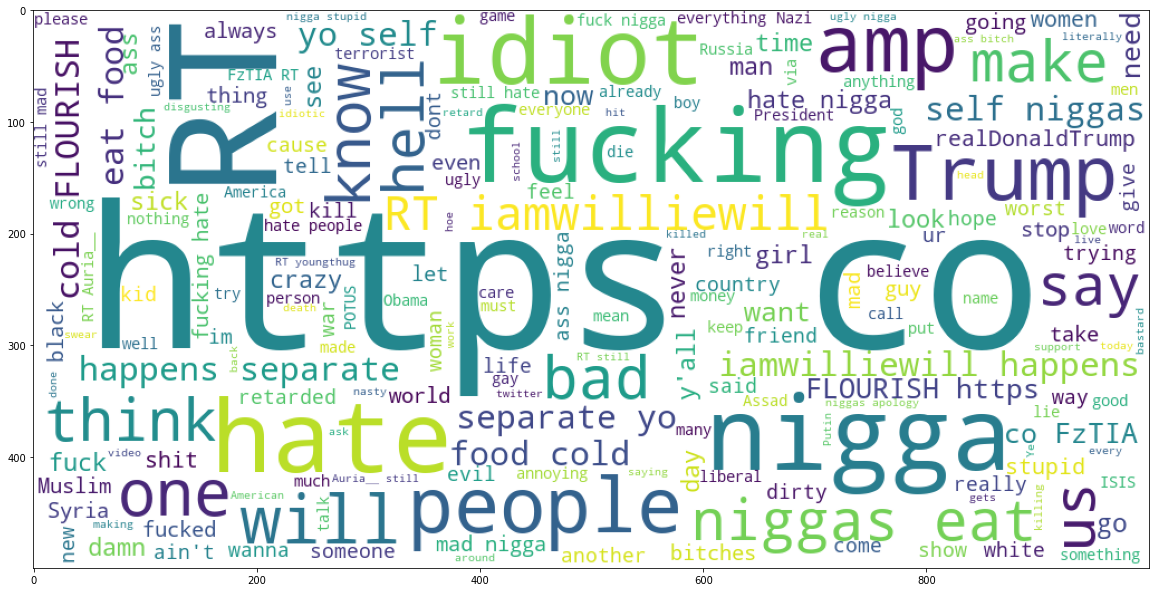

In [11]:
sentences = hs['text'].tolist()
print(len(sentences))

sentences_as_one_string = " ".join(sentences)
print("Hate speech keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


Abusive keywords:



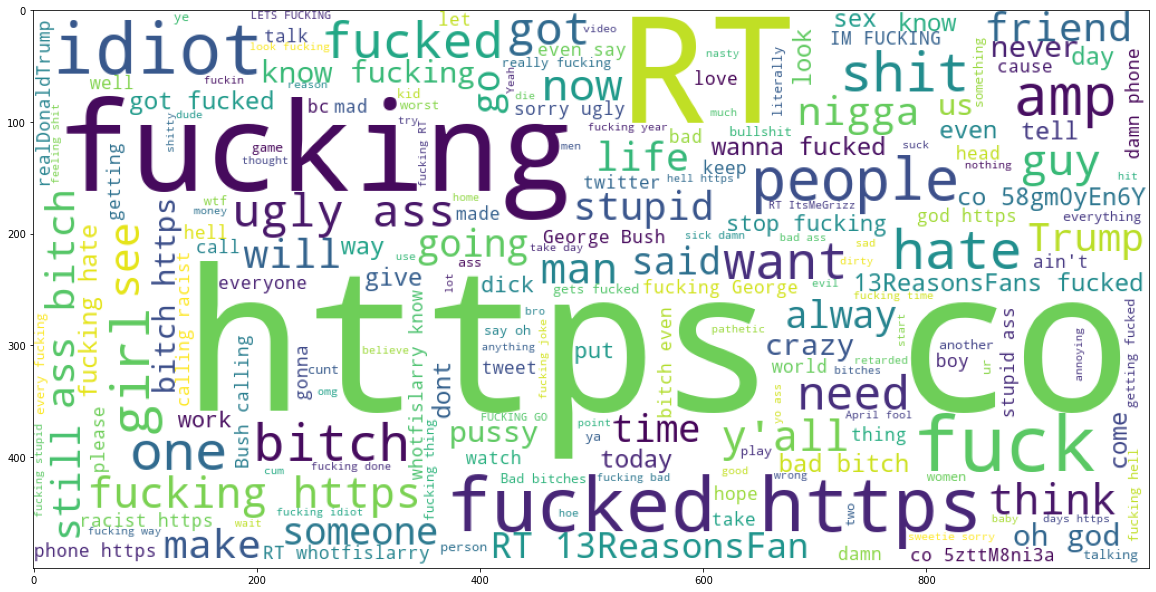

In [12]:
sentences = abusive['text'].tolist()
len(sentences)
print("Abusive keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


Neutral keywords:



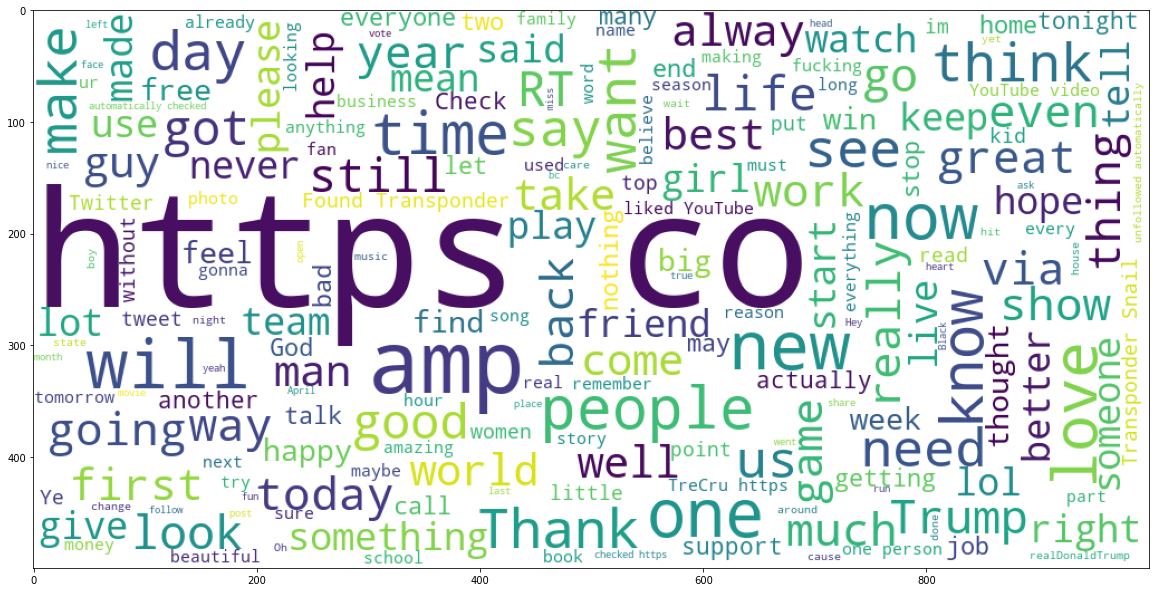

In [13]:
sentences = normal['text'].tolist()
len(sentences)
print("Neutral keywords:")
print("")
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))


Spam keywords:



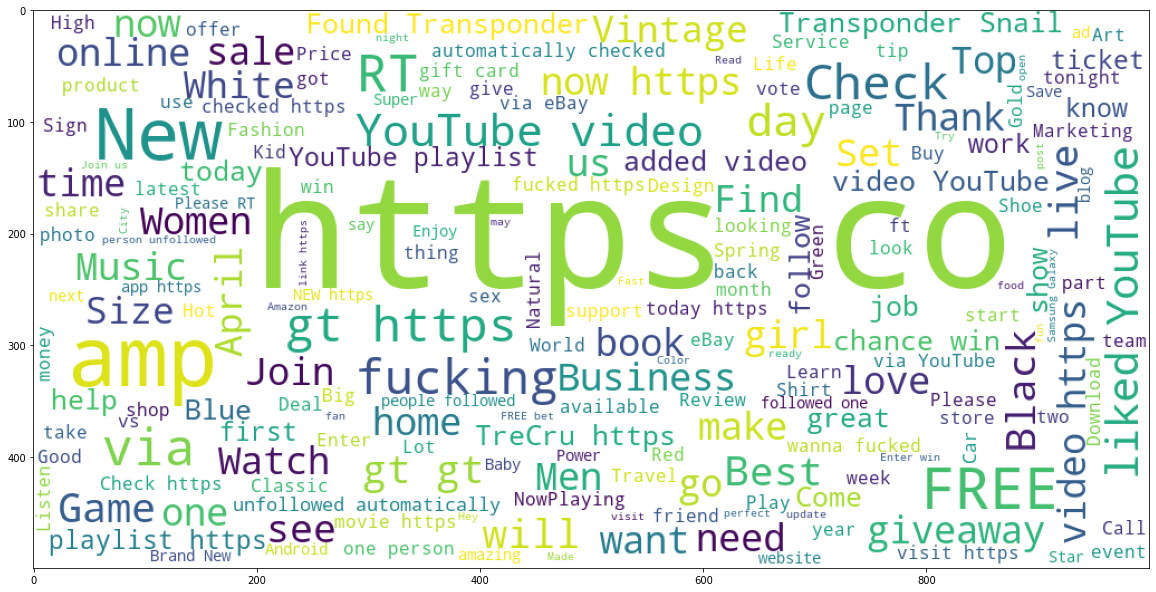

In [14]:
sentences = spam['text'].tolist()
len(sentences)
sentences_as_one_string = " ".join(sentences)
print("Spam keywords:")
print("")
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(width = 1000, height = 500,background_color="white").generate(sentences_as_one_string))

In [15]:
import string
string.punctuation

# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_clean_join = ' '.join(Test_punc_removed_join_clean)
    return Test_punc_removed_join_clean_join


In [16]:
# Create a new Dataframe for cleaned text
data_clean = pd.DataFrame(columns=['class', 'text'])
data_clean['text'] = data['text'].apply(message_cleaning)
data_clean['class'] = data['class']


In [17]:
data_clean.head()

,class,text
ID,,
0,spam,Beats Dr Dre urBeats Wired InEar Headphones Wh...
1,abusive,RT Papapishu Man would fucking rule party perp...
2,normal,time draw close 128591127995 Father draw near ...
3,normal,notice start act different distant bc peeped s...
4,normal,Forget unfollowers believe growing 7 new follo...


In [18]:
print("Original version:")
print(data['text'][5]) 
print("Cleaned:")
print(data_clean['text'][5]) 

Original version:
RT @Vitiligoprince: Hate Being sexually Frustrated Like I wanna Fuck But ion wanna Just fuck anybody
Cleaned:
RT Vitiligoprince Hate sexually Frustrated Like wanna Fuck ion wanna fuck anybody


In [19]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
text_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(data_clean['text']).toarray()

In [20]:
text_countvectorizer.shape

(99996, 1245)

In [21]:
x = text_countvectorizer
print(x)

[[ 9  0  0 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]
 [ 9  0  3 ...  0  0  0]
 ...
 [13  0  4 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]
 [ 9  0  0 ...  0  0  0]]


In [22]:
y = data_clean['class']
y = pd.get_dummies(y)
y = np.array(y)
print(y)

[[0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 ...
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


In [23]:
data.head()

,text,class,votes
ID,,,
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3


In [24]:
x.shape

(99996, 1245)

In [25]:
y.shape

(99996, 4)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [27]:
x_train.shape

(89996, 1245)

In [28]:
total_words = 200
total_words

200

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D


In [33]:
# Sequential Model
model1 = Sequential()

# embeddidng layer
model1.add(Embedding(total_words, output_dim = 32))
model1.add(LSTM(32))
model1.add(RepeatVector(200))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))

model1.add(Dense(4,activation= 'softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          6400      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 200, 32)           0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [34]:
# train the model
history = model1.fit(x_train, y_train, batch_size = 256, validation_split = 0.1, epochs = 75)

Epoch 1/75
317/317 [==============================] - 393s 1s/step - loss: 1.1774 - acc: 0.5212 - val_loss: 1.1114 - val_acc: 0.5416
Epoch 2/75
317/317 [==============================] - 389s 1s/step - loss: 1.1124 - acc: 0.5391 - val_loss: 1.1120 - val_acc: 0.5416
Epoch 3/75
317/317 [==============================] - 385s 1s/step - loss: 1.1121 - acc: 0.5388 - val_loss: 1.1112 - val_acc: 0.5416
Epoch 4/75
317/317 [==============================] - 386s 1s/step - loss: 1.1098 - acc: 0.5381 - val_loss: 1.1114 - val_acc: 0.5416
Epoch 5/75
317/317 [==============================] - 386s 1s/step - loss: 1.1114 - acc: 0.5401 - val_loss: 1.1118 - val_acc: 0.5416
Epoch 6/75
317/317 [==============================] - 386s 1s/step - loss: 1.1131 - acc: 0.5369 - val_loss: 1.1111 - val_acc: 0.5416
Epoch 7/75
317/317 [==============================] - 385s 1s/step - loss: 1.1130 - acc: 0.5378 - val_loss: 1.1112 - val_acc: 0.5416
Epoch 8/75
317/317 [==============================] - 386s 1s/step - 

The model achieved the score of approximately 0.54 (Acc).

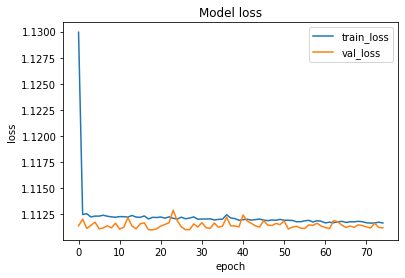

In [35]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()


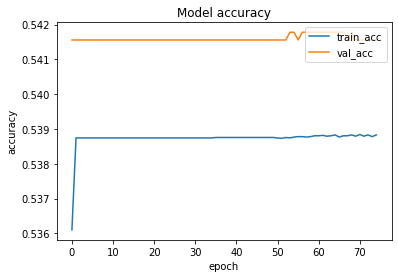

In [36]:
# plot the training artifacts

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()


In [37]:
model1.save("hate_speech.h5")

In [38]:
model1.evaluate(x_test,y_test)


313/313 [==============================] - 28s 88ms/step - loss: 1.1133 - acc: 0.5342


[1.1132631301879883, 0.5342000126838684]

In [41]:
print(data['text'][0])
print(data['text'][1])
print(data['text'][2])
print(data['text'][3])
print(data['text'][4])
print(data['text'][5])

Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE
RT @Papapishu: Man it would fucking rule if we had a party that was against perpetual warfare.
It is time to draw close to Him &#128591;&#127995; Father, I draw near to you now and always ❤️ https://t.co/MVRBBX2aqJ
if you notice me start to act different or distant.. it's bc i peeped something you did or i notice a difference in how you act &amp; ian fw it.
Forget unfollowers, I believe in growing. 7 new followers in the last day! Stats via https://t.co/bunPHQNXhj
RT @Vitiligoprince: Hate Being sexually Frustrated Like I wanna Fuck But ion wanna Just fuck anybody


In [43]:
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(data['text'][:5]).toarray()

In [44]:
preds = model1.predict(tweets_countvectorizer)

In [45]:
preds_class = []
for i in range(len(preds)):
    preds_class.append(np.argmax(preds[i]))
preds_class = np.array(preds_class) 

In [49]:
df = pd.DataFrame(columns=['Predicted labels', 'Actual labels'])
df['Predicted labels'] = preds_class
df['Actual labels'] = data['class'][:5]
df.head()

,Predicted labels,Actual labels
0,3,spam
1,0,abusive
2,2,normal
3,0,normal
4,0,normal


In [52]:
from sklearn.metrics import classification_report

y_pred = model1.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

#ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

#confusion matrix

157/157 [==============================] - 20s 128ms/step


ValueError: ignored

In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model1.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)

# F1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

# We can't have more than one value on y_type => The set is no more needed
#ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets


ValueError: ignored